<a href="https://colab.research.google.com/github/ming-90/Kaggle_Playground/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
cd /content/drive/MyDrive/Colab/캐글놀이터/4. Stock

/content/drive/MyDrive/Colab/캐글놀이터/4. Stock


>  # Data Load

In [99]:
data = pd.read_csv('data/Samsung.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-31,39900.0,39900.0,39460.0,39460.0,34243.273438,17992200
1,2017-02-01,39540.0,39660.0,39040.0,39120.0,33948.218750,14150400
2,2017-02-02,39600.0,39660.0,39200.0,39360.0,34156.484375,15029300
3,2017-02-03,39400.0,39500.0,39180.0,39460.0,34243.273438,10386350
4,2017-02-06,39580.0,39660.0,39140.0,39560.0,34330.054688,8860700


> # Compute Mid Price

In [6]:
high_prices = data["High"].values
low_prices = data["Low"].values
mid_prices = (high_prices + low_prices) / 2

> # Create Windows

In [79]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [97]:
result.shape

(1176, 51)

> # Normalize Data

In [80]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# normalize한 데이터의 90%를 train 데이터로 사용
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (118, 50, 1))

> # Build a Model

In [81]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


> # Training

In [82]:
model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          batch_size=10,
          epochs=20)

Epoch 1/20
106/106 [==============================] - 10s 56ms/step - loss: 0.0016 - val_loss: 6.4440e-04
Epoch 2/20
106/106 [==============================] - 5s 46ms/step - loss: 8.7348e-04 - val_loss: 5.2630e-04
Epoch 3/20
106/106 [==============================] - 5s 46ms/step - loss: 6.2807e-04 - val_loss: 4.3003e-04
Epoch 4/20
106/106 [==============================] - 5s 46ms/step - loss: 5.0210e-04 - val_loss: 2.0798e-04
Epoch 5/20
106/106 [==============================] - 5s 46ms/step - loss: 4.4625e-04 - val_loss: 2.1038e-04
Epoch 6/20
106/106 [==============================] - 5s 46ms/step - loss: 3.6282e-04 - val_loss: 1.6527e-04
Epoch 7/20
106/106 [==============================] - 5s 46ms/step - loss: 3.3546e-04 - val_loss: 1.2604e-04
Epoch 8/20
106/106 [==============================] - 5s 46ms/step - loss: 3.3372e-04 - val_loss: 1.8663e-04
Epoch 9/20
106/106 [==============================] - 5s 46ms/step - loss: 3.1000e-04 - val_loss: 1.2052e-04
Epoch 10/20
106/106 [=

> # Prediction

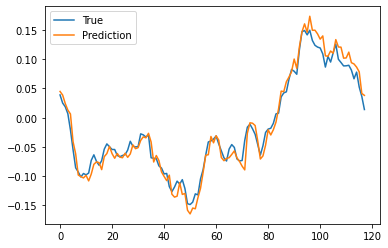

In [83]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [108]:
print(x_test[0])
print(y_test)
print(pred)

[[ 0.        ]
 [ 0.00439975]
 [ 0.00691389]
 [ 0.01445632]
 [ 0.01634192]
 [ 0.03142678]
 [ 0.03205531]
 [ 0.03331238]
 [ 0.03331238]
 [ 0.02514142]
 [ 0.02011314]
 [ 0.02074167]
 [ 0.01445632]
 [ 0.01697046]
 [ 0.02451288]
 [ 0.01822753]
 [ 0.01571339]
 [ 0.00314268]
 [ 0.00691389]
 [ 0.0087995 ]
 [ 0.01508485]
 [ 0.02514142]
 [ 0.0282841 ]
 [ 0.02388435]
 [ 0.01885607]
 [ 0.00942803]
 [ 0.00754243]
 [ 0.0106851 ]
 [ 0.01634192]
 [ 0.01571339]
 [ 0.01257071]
 [-0.00188561]
 [ 0.00251414]
 [ 0.00565682]
 [-0.00251414]
 [ 0.00628536]
 [ 0.00314268]
 [-0.00691389]
 [-0.0106851 ]
 [-0.00942803]
 [-0.00251414]
 [ 0.        ]
 [-0.00502828]
 [-0.00754243]
 [-0.01131364]
 [-0.00565682]
 [-0.0106851 ]
 [-0.00565682]
 [ 0.01005657]
 [ 0.03645506]]
[ 0.0389692   0.02503129  0.01872659  0.00681537 -0.02102659 -0.05484461
 -0.08587089 -0.09306569 -0.10158151 -0.09564684 -0.09796673 -0.09482759
 -0.07311029 -0.06365884 -0.07484663 -0.08148148 -0.07363861 -0.05388471
 -0.04494382 -0.04984424 -0.05

In [93]:
test_data = pd.read_csv("data/test.csv")

In [94]:
high_prices = test_data["High"].values
low_prices = test_data["Low"].values
mid_prices = (high_prices + low_prices) / 2

#pred = model.predict(test_data)


ValueError: ignored